## TOC
0. [Problem Statement](#Multiple-Linear-Regression)
1. [Understanding of Data](#Step-1:-Reading-and-Understanding-the-Data)
2. [Visualising the Data](#Step-2:-Visualising-the-Data)<br>
    2.1[Inferences from EDA](#Inferences-from-EDA-of-categorical-and-numerical-variables:)
3. [Data Preparation](#Step-3:-Data-Preparation)
4. [Splitting the Data into Test/Train dataset](#Step-4:-Splitting-the-data-into-test-and-train-datasets)
5. [Build a Linear Model](#Step-5:-Building-a-linear-model)<br>
    5.1 [Manual Feature Selection](#Manual-Feature-Selection)<br>
            5.1.1 [Final Manual Feature Selection](#Re-Building-Model_23-as-Final-Manual-Model-and-checking-R-Squared-and-Adj.R-Squared)<br>
    5.2 [RFE Feature Selection](#Feature-Selection-Using-RFE)
6. [Residual Analysis](#Step-6:--Residual-Analysis)
7. [Making Predictions](#Step-7:-Making-Predictions)
8. [Model Evaluation](#Step-8:-Model-Evaluation)<br>
    8.1 [Mean Squared Error](#Mean-Squared-Error:)<br>
    8.2 [R-Squared Score](#R-Squared-Score:)
9. [Step We Followed](#Steps-We-Followed-:)

# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- To create a linear model that quantitatively relates bike counts with variables such as tempreture, weather, season, year etc.
- To know the accuracy of the model, i.e. how well these variables can predict bikes demands.

**So interpretation is important!**

In [1]:
try:
    import warnings
    warnings.filterwarnings('ignore')
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    
except Exception as e:
    print(f"[Library Import] Error : {e}")


## Step 1: Reading and Understanding the Data


In [2]:
df = pd.read_csv("day.csv")
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

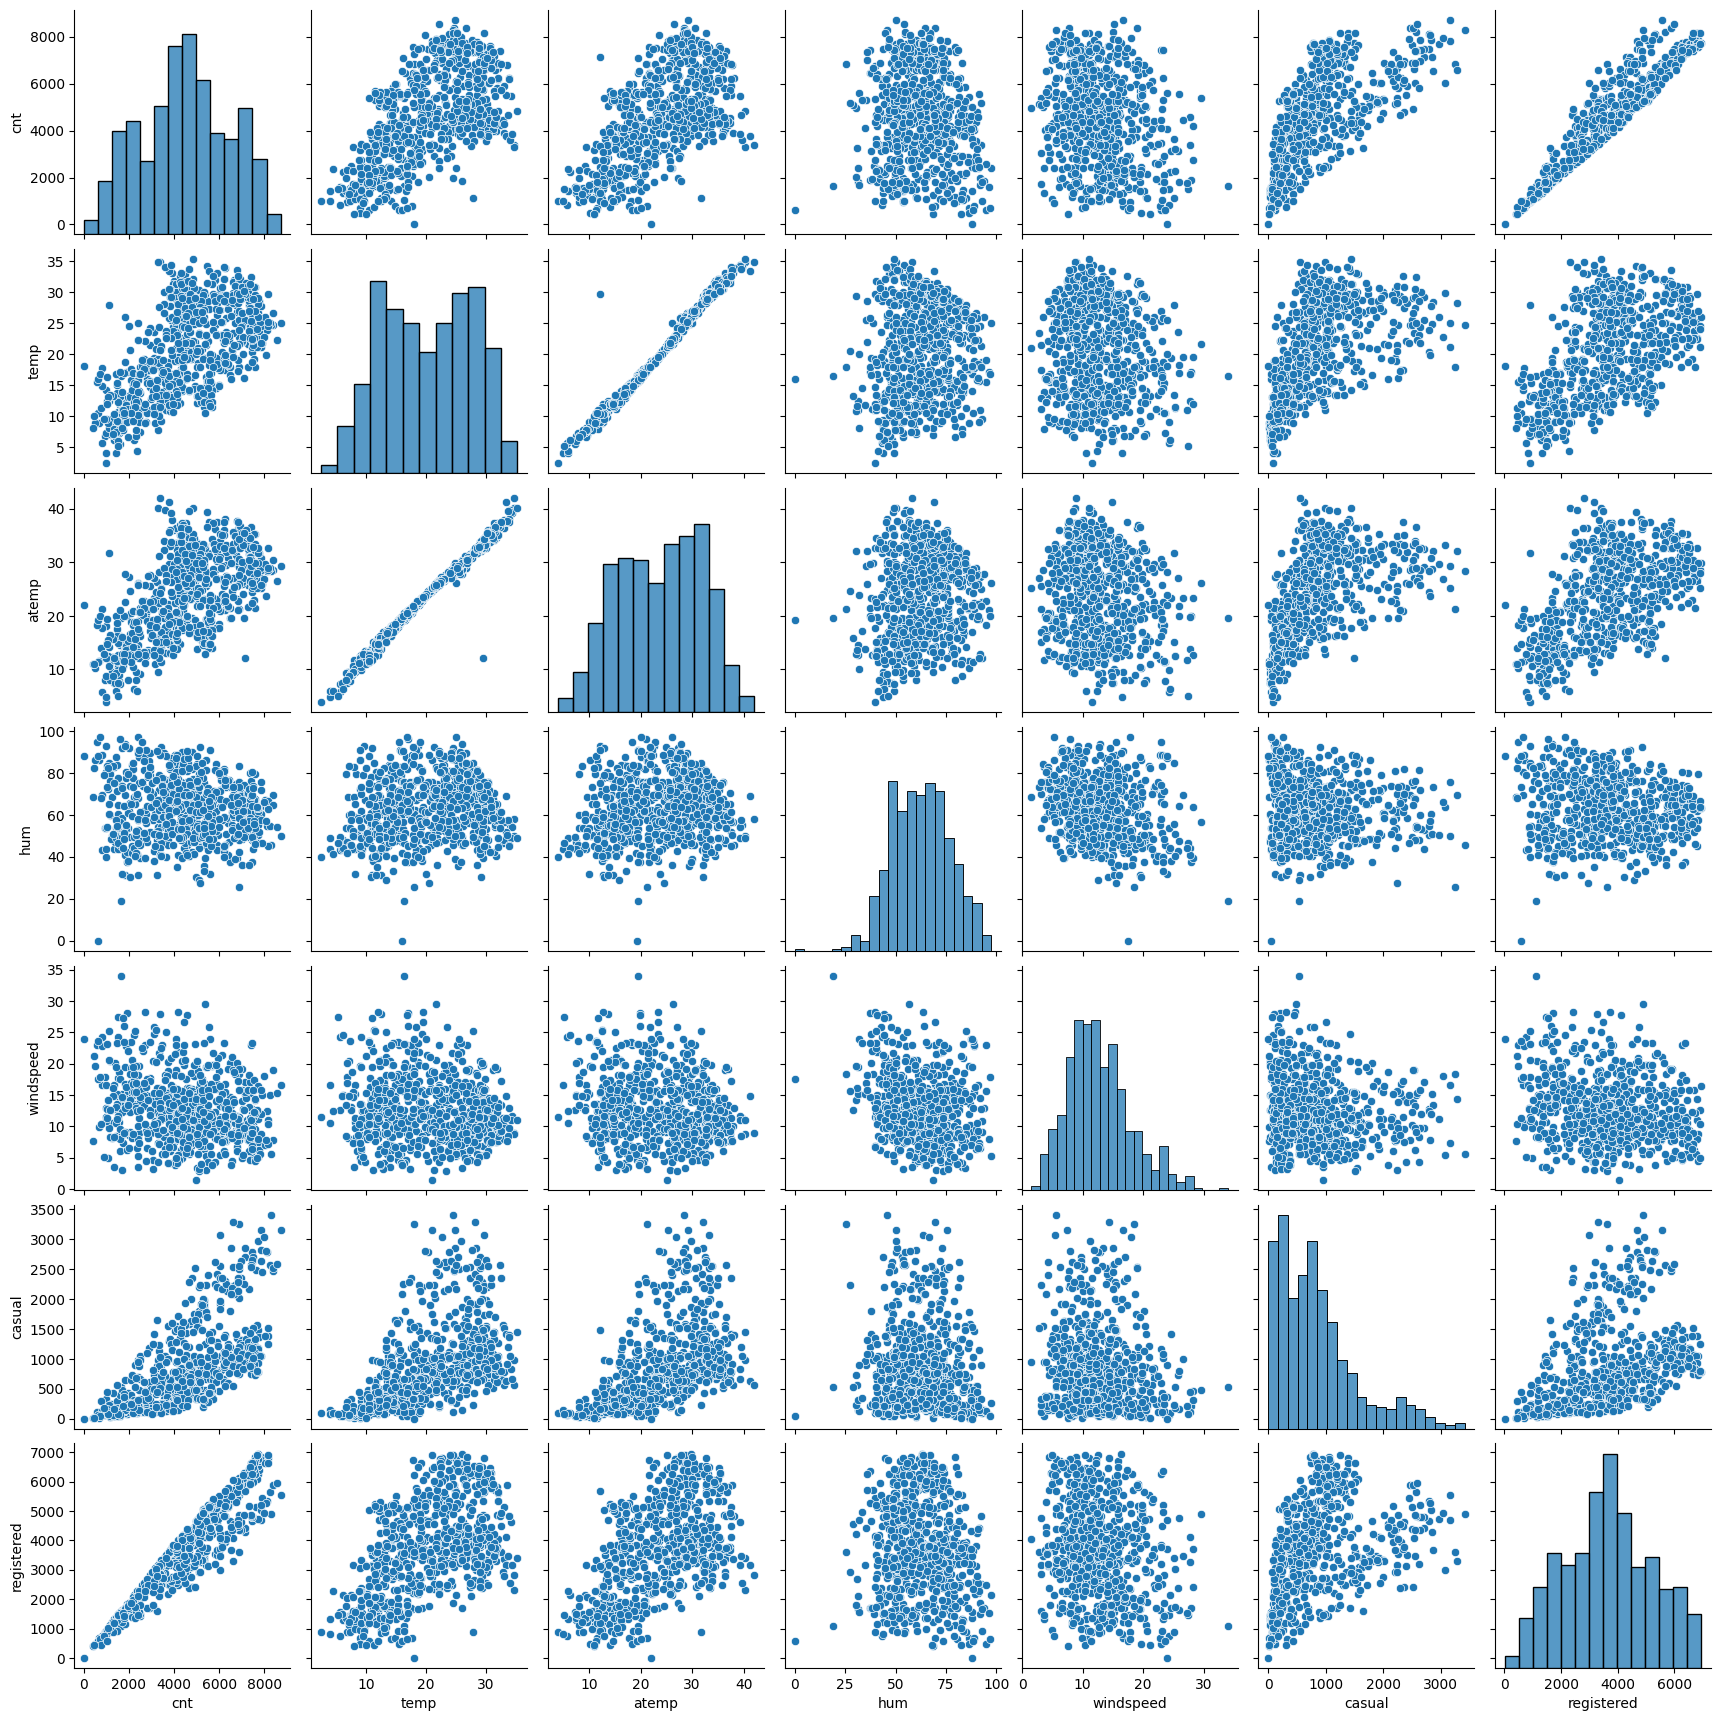

In [5]:
vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

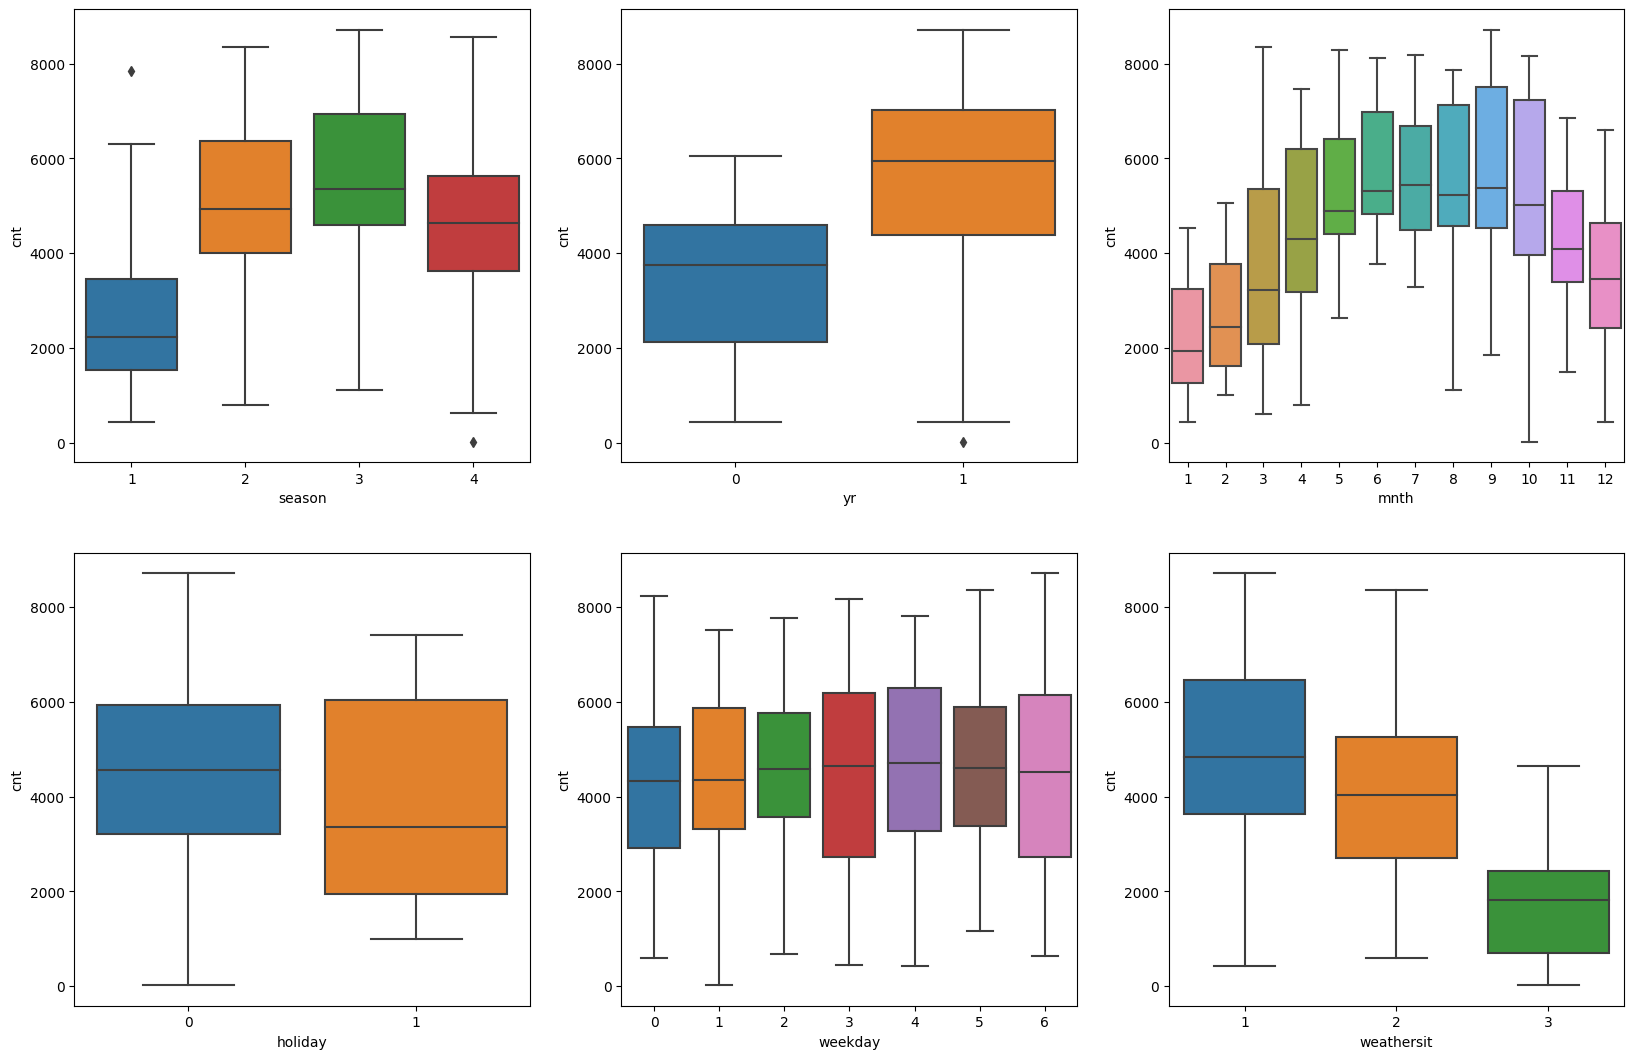

In [6]:
# Box Plots for categorical variables

plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.show()

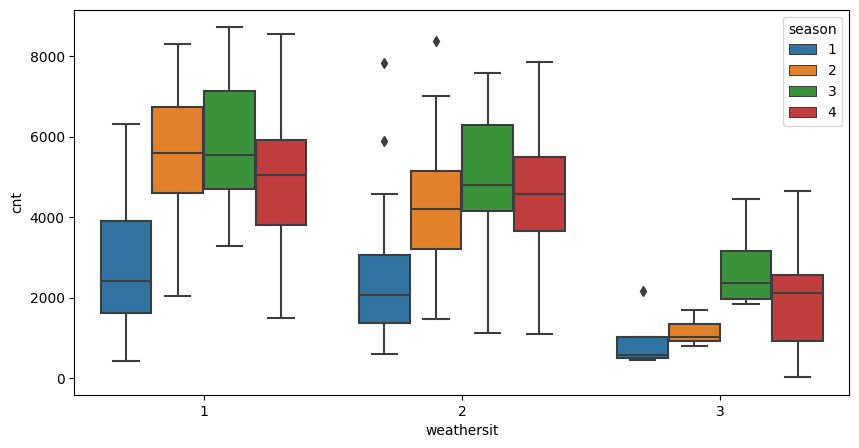

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = df)
plt.show()

### Inferences from EDA of categorical and numerical variables:

- Registered column has the most linearity with count column
- Season - Season having positive trend in the number of count in 2 - Summer, 3 - Fall and 4 - Winter seasons
- Year - Overall business is grown within year.
- Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.
- Holiday : The count on normal days are more than holidays
- Weekday : Weekdays or weekends do not show any specific trend here.
- Weathersit : Clearer weathers show a postive trend in the number of bike users, other 2 are Mist and Light Snow.

In [8]:
df_corr = df.corr()
df_corr

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


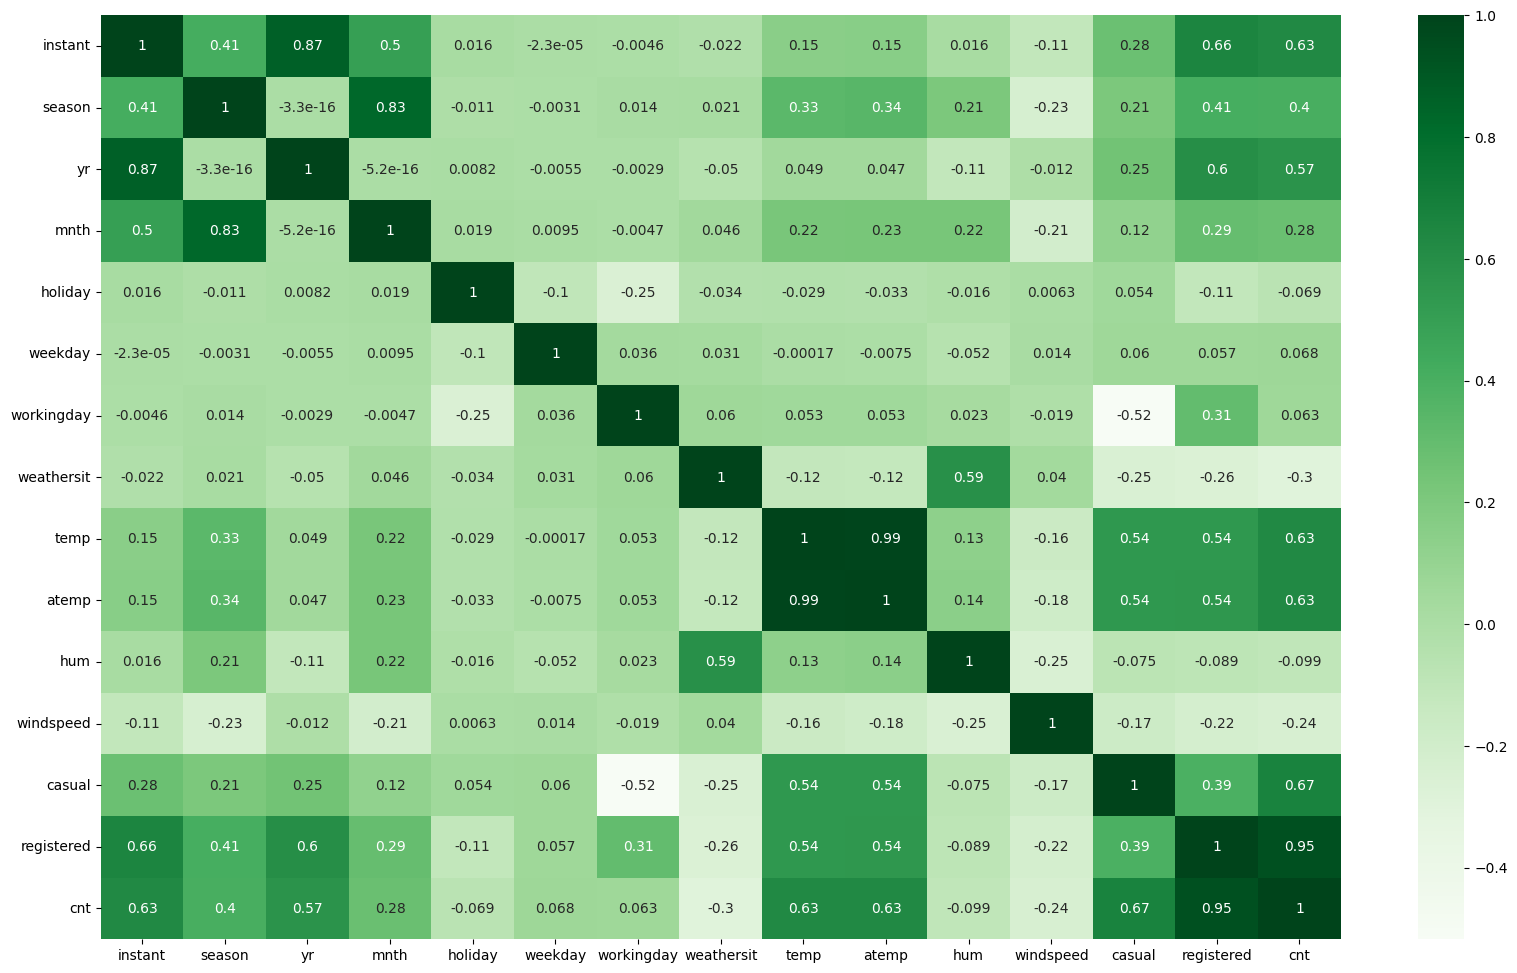

In [9]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_corr,annot=True,cmap="Greens")
plt.show()

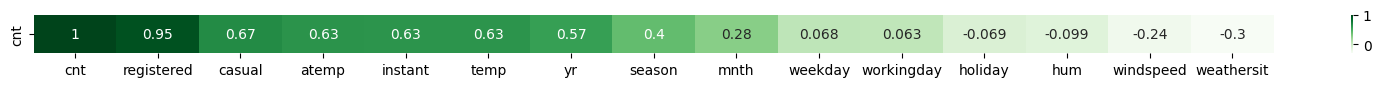

In [10]:
plt.figure(figsize=(20, 0.5))
sns.heatmap(df_corr.loc[["cnt"]].sort_values(by="cnt",axis=1,ascending=False),annot=True,cmap="Greens")
plt.show()

#### Lightest and Darkest areas show the most co-relation among the variables.
- Lighest Green - Negative corelation
- Darkest Green - Positive corelation

#### From the heatmap, we can infer that the following variables show the most corelation with the target variable
- Registered
- Casual
- atemp
- instant
- temp
- yr
- season
- mnth

## Step 3: Data Preparation

In [11]:
df_one = df.copy()
df_one["dteday"] = pd.to_datetime(df_one["dteday"],format="%d-%m-%Y",yearfirst=True)
df_one.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [12]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
df_one.duplicated().any()

False

### Dummy Variables

In [14]:
def assign_dummies(
    df:pd.DataFrame,
    df_column:str,
    mapping:dict=None,
    need_mapping:bool=False,
    start_with_zero:bool=False):
    """
    This method takes dataframe with column and its mapping retrun same dataframe with dummies.
    """
    assert df_column, "need atleast one column to proceed!!!".title()
    
    # if mapping is not given then create one
    if need_mapping:
        mapping = dict()
        uniques_ = df[df_column].unique()
        mapping = dict()
        if start_with_zero:
            for unique in range(len(uniques_)):
                mapping[unique] = uniques_[unique]
        else:
            for unique in range(1,len(uniques_)+1):
                mapping[unique] = uniques_[unique-1]
                
    # if mapping then map it to categorical values
    if mapping:
        df[df_column] = df[df_column].map(mapping)
        
    col_ = pd.get_dummies(df[df_column],drop_first=True)
    df = pd.concat([df,col_],axis=1)
    df.drop(df_column,inplace = True,axis=1)
    return df   
    

#### Dummy For `Season` Column
- 1 : Spring
- 2 : summer
- 3 : fall
- 4 : winter

In [15]:
# season column has four unique values i.e season (1:spring, 2:summer, 3:fall, 4:winter)
# 1. assign these values and create dummies for the same

df_one = assign_dummies(df=df_one,df_column="season",mapping={1:"spring", 2:"summer", 3:"fall", 4:"winter"})

#### Dummy For `Yr` Column
- 1 : 2019
- 0 : 2018

In [16]:
# Column 'yr', this column has already 0 and 1 value,
# if 2018 is 0 then column name will be 2019 according to get_dummies method

df_one.rename(columns = {'yr':'2019'}, inplace = True)

#### Dummy For `mnth` Column
- 1 to 12 month

In [17]:
# Column : 'mnth', this columns has 1 to 12 values,
# we assigned month from dteday column and created dummies for column mnth

df_one["mnth"] = df_one["dteday"].dt.month_name()
df_one = assign_dummies(df=df_one,df_column="mnth")

#### Dummy For `holiday` Column
- 1 : Holiday Yes
- 0 : Holiday No

In [18]:
# Column 'holiday', this column has 1 and 0 value
# if no holiday is 0 then column name will be holiday_yes according to get_dummies method

df_one.rename(columns = {'holiday':'holiday_yes'}, inplace = True)

#### Dummy For `weekday` Column
- weekdays from 0 to 6
- starts 0 : Tuesday
- ends 6 : Monday

In [19]:
# Column 'weekday', this columns has 0 to 6 values,
# where 6 = monday and 0 = tuesady, wednesday = 1
# we assigned weekday from dteday column and created dummies for column weekday

df_one["weekday"] = df_one["dteday"].dt.day_name()
df_one = assign_dummies(df=df_one,df_column="weekday")

#### Dummy For `workingday` Column

- 0 : No working day
- 1 : Working day

In [20]:
# Column 'workingday', this columns has 0 and 1 values,
# where 0 = not a workingday and 1 = workingday

df_one.rename(columns = {'workingday':'workingday_yes'}, inplace = True)

#### Dummy For `weathersit` Column
- 1: clear
- 2: misty
- 3: light snow
- 4: heavy rain

In [21]:
# Column 'weathersit', this column has 3 unique values i.e : (1:'clear', 2:'misty', 3:'light snow', 4: 'heavy rain')

df_one = assign_dummies(df=df_one,df_column="weathersit",mapping={1:'clear', 2:'misty', 3:'light snow', 4: 'heavy rain'})

In [22]:
df_one.head(3)

,instant,dteday,2019,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,casual,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,misty
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0


Dummy For `Registered` Column
- 0 - 0.2 : Very Low
- 0.2 - 0.4 : Low
- 0.4 - 0.6 : Medium
- 0.6 - 0.8 : High
- 0.8 - 1 : Very High

In [23]:
# Defining the names of the bins

bins=['very low','low','medium','high','very high']
df_one['registered_bin']=pd.qcut(df_one['registered'],q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=bins)
df_one.head(3)

,instant,dteday,2019,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,casual,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow,misty,registered_bin
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,1,0,0,0,0,0,0,1,very low
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,1,0,0,1,very low
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,1,0,0,very low


In [24]:
# Getting dummy variable for registered_bin variable

registered_bin_dummies=pd.get_dummies(df_one.registered_bin, drop_first=True) #Dropping the first dummy variable
registered_bin_dummies.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [25]:
# Concatinating bins to the original dataframe

df_one=pd.concat([df_one,registered_bin_dummies], axis=1)
df_one.head(3)

,instant,dteday,2019,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,casual,...,Thursday,Tuesday,Wednesday,light snow,misty,registered_bin,low,medium,high,very high
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,very low,0,0,0,0
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,1,0,0,1,very low,0,0,0,0
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,very low,0,0,0,0


- Initially remove dteday as we have mnth, day and year
- Remove column Instant as it is none of use.
- Remove atemp since we have a similar variable temp in the data
- Initially removing Registered and Casual columns as our target variable Count is derived from addition of these columns

In [26]:
# Dropping other categorical variables like dteday and instant from the dataframe

df_one.drop(columns=['instant','dteday','atemp'], inplace=True)
df_one.drop(columns=['casual','registered','registered_bin'], inplace=True)

In [27]:
df_one.head(3)

,2019,holiday_yes,workingday_yes,temp,hum,windspeed,cnt,spring,summer,winter,...,Sunday,Thursday,Tuesday,Wednesday,light snow,misty,low,medium,high,very high
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
df_one.describe()

,2019,holiday_yes,workingday_yes,temp,hum,windspeed,cnt,spring,summer,winter,...,Sunday,Thursday,Tuesday,Wednesday,light snow,misty,low,medium,high,very high
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.200000,0.200000,0.200000,0.200000
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.400274,0.400274,0.400274,0.400274
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2019            730 non-null    int64  
 1   holiday_yes     730 non-null    int64  
 2   workingday_yes  730 non-null    int64  
 3   temp            730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   spring          730 non-null    uint8  
 8   summer          730 non-null    uint8  
 9   winter          730 non-null    uint8  
 10  August          730 non-null    uint8  
 11  December        730 non-null    uint8  
 12  February        730 non-null    uint8  
 13  January         730 non-null    uint8  
 14  July            730 non-null    uint8  
 15  June            730 non-null    uint8  
 16  March           730 non-null    uint8  
 17  May             730 non-null    uin

In [30]:
df_one.columns = [i.lower() for i in df_one.columns] # lower all the column names
df_one.head(2)

,2019,holiday_yes,workingday_yes,temp,hum,windspeed,cnt,spring,summer,winter,...,sunday,thursday,tuesday,wednesday,light snow,misty,low,medium,high,very high
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Step 4: Splitting the data into test and train datasets

In [31]:
df_train, df_test = train_test_split(df_one, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
print(df_train.shape,df_test.shape)

(510, 33) (219, 33)


#### Resclaing the feature variables

In [33]:
scaler=MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [col for col in df_one.columns if df_one[col].min() > 0 or df_one[col].max() > 1 ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.describe()

,2019,holiday_yes,workingday_yes,temp,hum,windspeed,cnt,spring,summer,winter,...,sunday,thursday,tuesday,wednesday,light snow,misty,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.200000,0.198039,0.188235,0.205882
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.400393,0.398913,0.391284,0.404742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


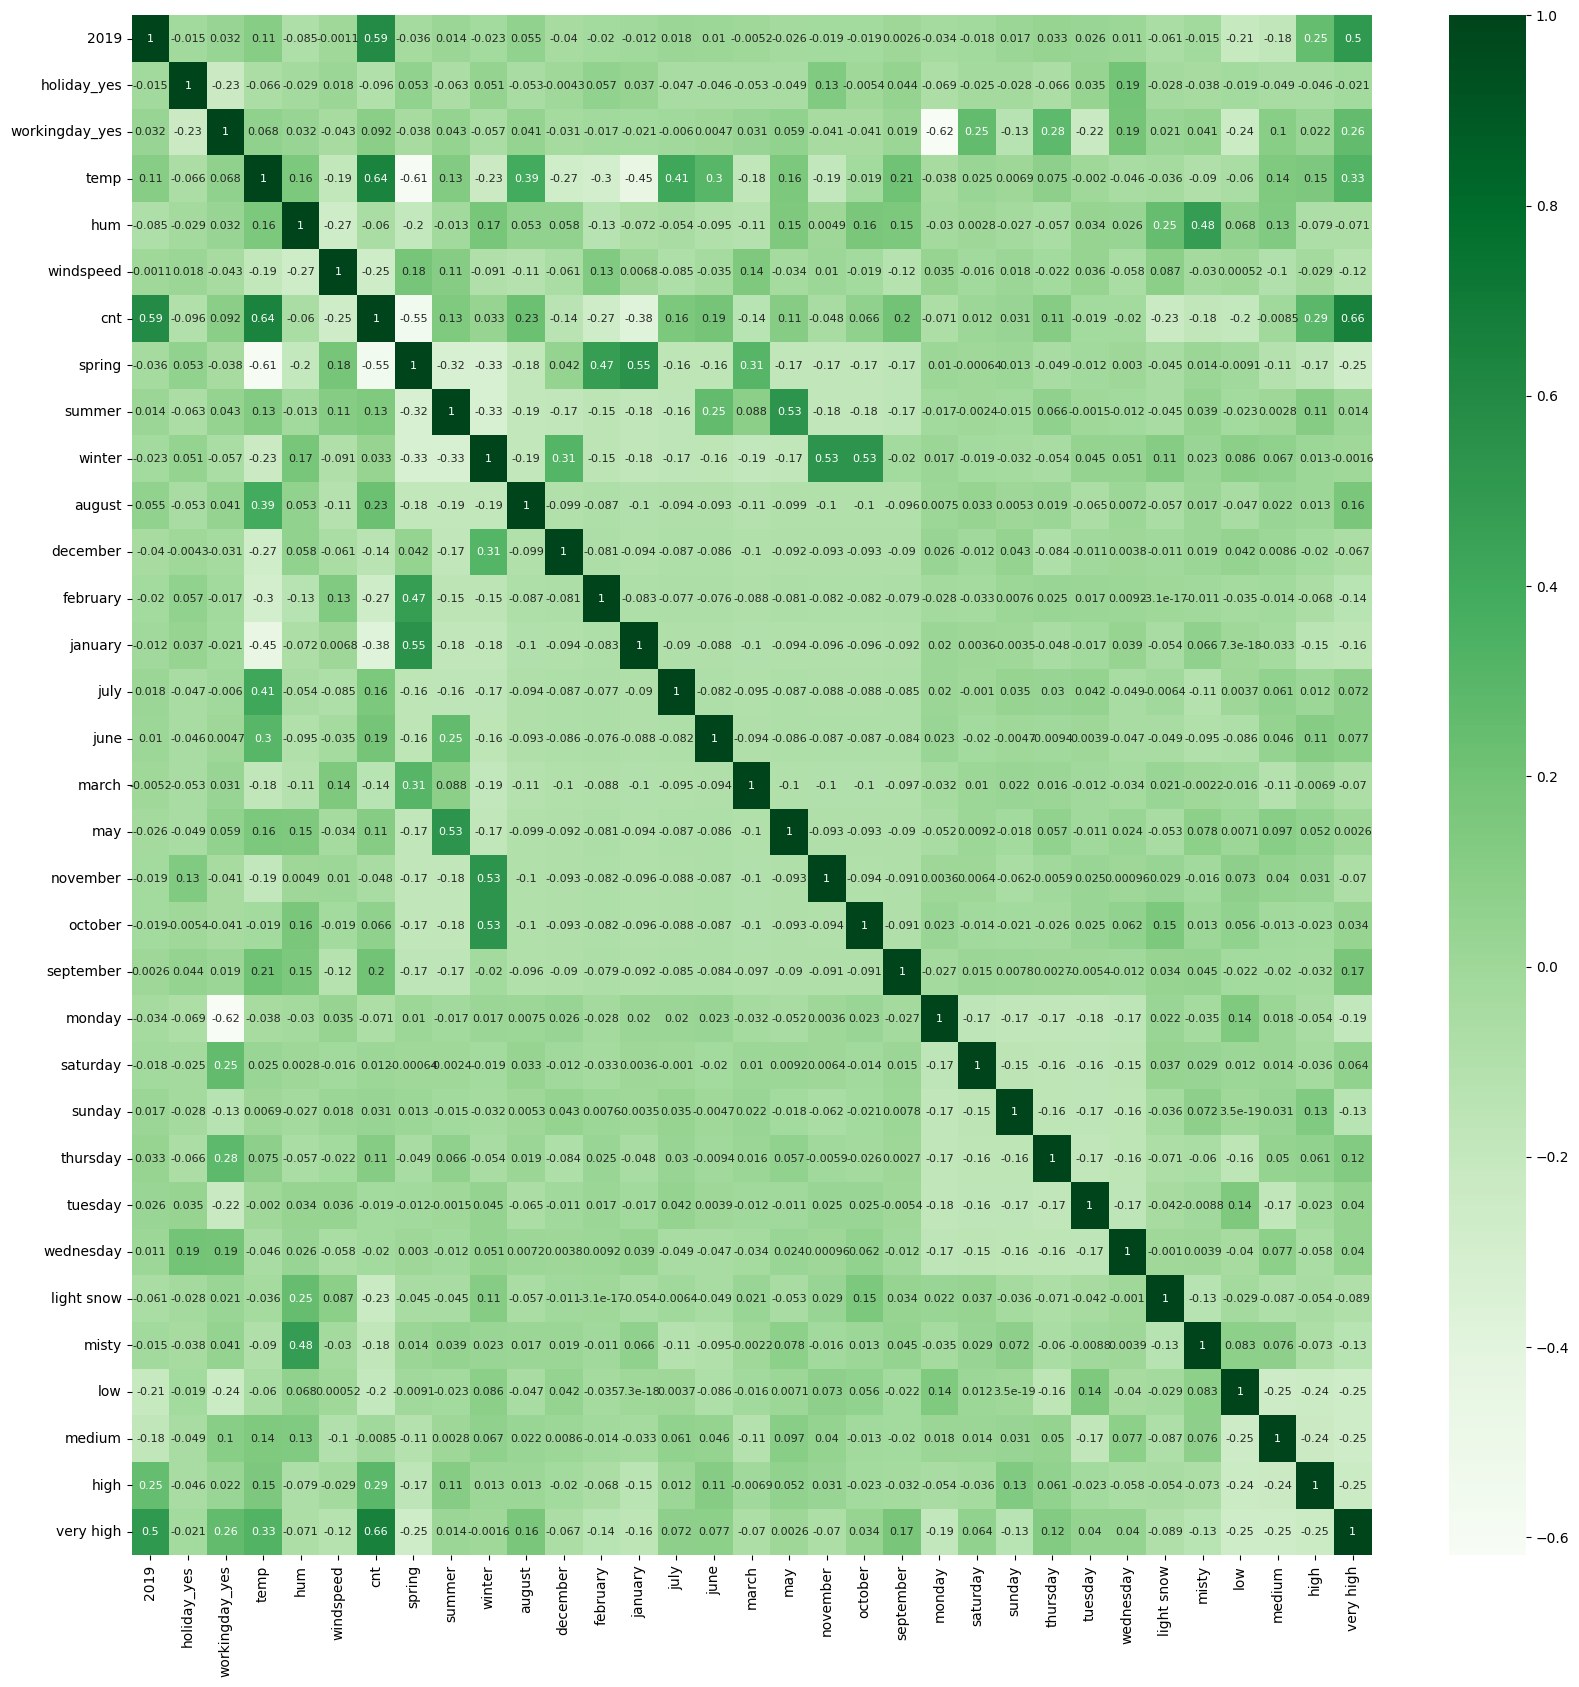

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens",annot_kws={"fontsize":8})
plt.show()

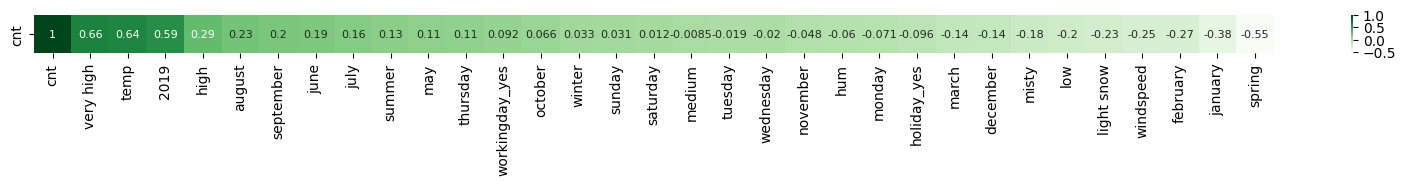

In [37]:
plt.figure(figsize=(20, 0.5))
sns.heatmap(df_train.corr().loc[["cnt"]].sort_values(by="cnt",axis=1,ascending=False),annot=True,cmap="Greens",annot_kws={"fontsize":8})
plt.show()

#### We can see that temperature has the most corelated to the count than any other variable with 0.64 coefficient. We will proceed to try a regression model using temp as our predictor variable.

- Here we are not including columns related to Registered because registered is a part of count which totally linear.

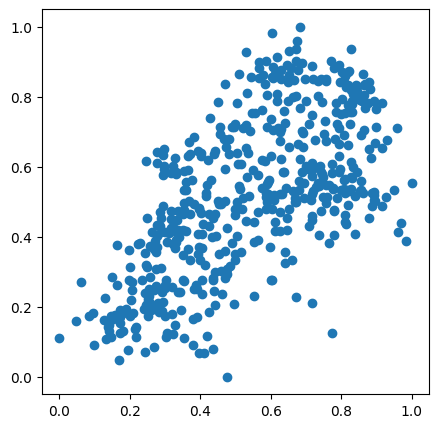

In [38]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building


In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

- Since we would be using registered bins as an Extra feature, we will remove it now for feature selection.
- It will be additional `Feature`, that we will add to our final model to improvise the R-Squared

In [40]:
X_train.drop(columns=['low','medium','high','very high'], inplace=True)

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Manual Feature Selection

As we are going to use `sm` library many times to get `OLS Params/Summary` for various combination of variables, we are going to create `Python function` named as `construct_ols`to make process easy.

In [41]:
def construct_ols(x_train,y_train):
    x_train_lm = sm.add_constant(x_train) # add constant
    lr = sm.OLS(y_train,x_train_lm).fit()
    return x_train_lm,lr

As we are going to check `P-Value` after every `OLS Model` we are going to construct `Python Function` which returns `highest_p_value` from `lr.summary()`

In [42]:
def find_highest_p_value(lr_,significance=0.05):    
    high_p_value = 0
    remove_col = None
    
    # check high p-value
    for i in lr_.summary().tables[1].data[1:]:
        
        # P>|t| value is at 4th Index number
        p_value = float(i[4])
        
        if p_value >= high_p_value:
            high_p_value = p_value
            remove_col = i[0]
    if high_p_value > significance:
        print(f"Remove Column : {remove_col} as it has highest P-Value of {high_p_value}.")
        return remove_col,high_p_value
    
    print(f"No P-Value is exceeding significance vale {significance} please check VIF.")
    return None,None

#### model 1

In [43]:
model_1,lr = construct_ols(x_train=X_train[['temp']],y_train=y_train)

# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.80e-61
Time:                        04:49:39   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [44]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

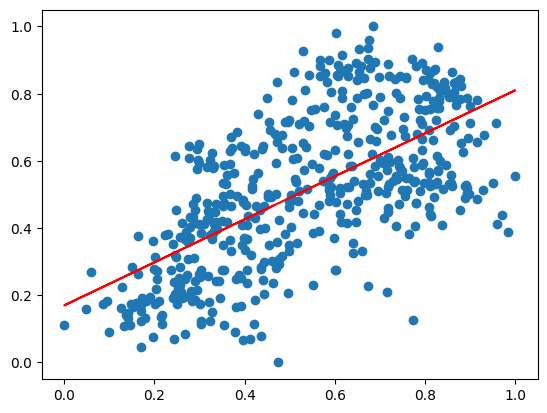

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(model_1.iloc[:, 1], y_train)
plt.plot(model_1.iloc[:, 1], 0.170 + 0.640*model_1.iloc[:, 1], 'r')
plt.show()

In [46]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

No P-Value is exceeding significance vale 0.05 please check VIF.


#### We have R squared value of 0.41 with just the temperature variable. Meaning 41% of the variance is explained by temperature feature. P-value of the feature is also 0. So, temperature is statistically significant here.

Our line beta 0 is 0.6400 and beta 1 is 0.1698

So let's go ahead and add the second most highly correlated variable, i.e. `2019` (yr).

#### model 2

In [47]:
model_2,lr = construct_ols(x_train=X_train[["temp","2019"]],y_train=y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.25e-130
Time:                        04:49:39   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

In [48]:
lr.params

const    0.079628
temp     0.583559
2019     0.237213
dtype: float64

In [49]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

No P-Value is exceeding significance vale 0.05 please check VIF.


We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.413` from `0.689`.
Let's go ahead and add another variable, `August`.

#### model 3

In [50]:
model_3,lr = construct_ols(x_train=X_train[["temp","2019","august"]],y_train=y_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.10e-128
Time:                        04:49:39   Log-Likelihood:                 338.20
No. Observations:                 510   AIC:                            -668.4
Df Residuals:                     506   BIC:                            -651.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.015      4.878      0.0

In [51]:
lr.params

const     0.074968
temp      0.596699
2019      0.237419
august   -0.026061
dtype: float64

In [52]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : august as it has highest P-Value of 0.202.


We have clearly see that `Adjusted R-Squared` did not changed after adding `August` colun but `P-Value` of August is greater than `0.05` which means we have to drop `August` from dataset.

But before removing the August we will build the model including all the available variable.

#### model 4

In [53]:
model_4,lr = construct_ols(x_train=X_train,y_train=y_train)

In [54]:
lr.params

const             0.332246
2019              0.231256
holiday_yes      -0.083874
workingday_yes    0.000673
temp              0.447038
hum              -0.156498
windspeed        -0.183726
spring           -0.043368
summer            0.042418
winter            0.110165
august            0.020841
december         -0.044909
february         -0.036749
january          -0.063215
july             -0.035557
june              0.000345
march             0.000490
may               0.023423
november         -0.042715
october           0.006412
september         0.086134
monday           -0.024033
saturday          0.003295
sunday            0.009911
thursday          0.003733
tuesday          -0.025683
wednesday        -0.010418
light snow       -0.251377
misty            -0.059190
dtype: float64

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.86
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.19e-179
Time:                        04:49:39   Log-Likelihood:                 523.43
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     481   BIC:                            -866.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3322      0.047      6.

In [56]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : june as it has highest P-Value of 0.989.


Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

As we are going to use `VIF` library many times to get `Variance Inflation Factor` for various combination of variables, we are going to create `Python function` named as `get_vif`to make process easy.

In [57]:
def get_vif(x_dataframe):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    if 'const' in x_dataframe.columns:
        x_dataframe = x_dataframe.drop(['const'], axis=1)
    
    vif = pd.DataFrame()
    vif['Features'] = x_dataframe.columns
    vif['VIF'] = [variance_inflation_factor(x_dataframe.values, i) for i in range(x_dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
get_vif(X_train)

,Features,VIF
4,hum,38.26
3,temp,38.12
6,spring,12.06
8,winter,11.88
2,workingday_yes,8.52
7,summer,7.37
18,october,6.49
17,november,6.18
9,august,6.05
13,july,5.44


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `June` as it has a very high p-value of `0.989`. Let's go ahead and drop this variables

#### model 5

In [60]:
print(f"Droping {drop_column} from dataframe")
X = X_train.drop(drop_column,axis=1)
model_5,lr = construct_ols(x_train=X,y_train=y_train)

Droping june from dataframe


In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.08e-180
Time:                        04:49:39   Log-Likelihood:                 523.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3324      0.047      7.

In [62]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : march as it has highest P-Value of 0.987.


In [63]:
get_vif(model_5)

,Features,VIF
4,hum,38.25
3,temp,24.23
6,spring,11.88
8,winter,11.82
2,workingday_yes,8.48
7,summer,6.94
16,november,5.83
17,october,5.78
12,january,5.31
5,windspeed,5.19


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `March` as it has a very high p-value of `0.987`. Let's go ahead and drop this variables

#### model 6

In [64]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_6,lr = construct_ols(x_train=X,y_train=y_train)

Droping march from dataframe


In [65]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.85e-181
Time:                        04:49:40   Log-Likelihood:                 523.43
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     483   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3326      0.044      7.

In [66]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : workingday_yes as it has highest P-Value of 0.964.


In [67]:
get_vif(model_6)

,Features,VIF
4,hum,36.22
3,temp,22.91
8,winter,10.54
2,workingday_yes,8.41
6,spring,7.79
7,summer,6.90
5,windspeed,5.16
16,october,4.83
15,november,4.81
18,monday,3.69


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday_yes` as it has a very high p-value of `0.964`. Let's go ahead and drop this variables

#### model 7

In [68]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_7,lr = construct_ols(x_train=X,y_train=y_train)

Droping workingday_yes from dataframe


In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.51e-182
Time:                        04:49:40   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     484   BIC:                            -884.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3333      0.042      8.021      

In [70]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : october as it has highest P-Value of 0.842.


In [71]:
get_vif(model_7)

,Features,VIF
3,hum,35.45
2,temp,21.68
7,winter,10.42
5,spring,7.44
6,summer,6.59
4,windspeed,5.06
15,october,4.82
14,november,4.77
8,august,3.44
9,december,3.34


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `October` as it has a very high p-value of `0.842`. Let's go ahead and drop this variables

#### model 8

In [72]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_8,lr = construct_ols(x_train=X,y_train=y_train)

Droping october from dataframe


In [73]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.18e-183
Time:                        04:49:40   Log-Likelihood:                 523.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -890.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3346      0.041      8.167      

In [74]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : saturday as it has highest P-Value of 0.822.


In [75]:
get_vif(model_8)

,Features,VIF
3,hum,33.86
2,temp,21.67
5,spring,7.42
7,winter,6.17
6,summer,5.95
4,windspeed,4.98
8,august,3.18
12,july,2.85
11,january,2.42
23,misty,2.36


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Saturday` as it has a very high p-value of `0.822`. Let's go ahead and drop this variables

#### model 9

In [76]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_9,lr = construct_ols(x_train=X,y_train=y_train)

Droping saturday from dataframe


In [77]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.79e-184
Time:                        04:49:40   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     486   BIC:                            -897.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3363      0.040      8.355      

In [78]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : thursday as it has highest P-Value of 0.867.


In [79]:
get_vif(model_9)

,Features,VIF
3,hum,33.82
2,temp,21.32
5,spring,7.20
7,winter,5.99
6,summer,5.77
4,windspeed,4.97
8,august,3.13
12,july,2.81
11,january,2.41
22,misty,2.36


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Thursday` as it has a very high p-value of `0.867`. Let's go ahead and drop this variables

#### model 10

In [80]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_10,lr = construct_ols(x_train=X,y_train=y_train)

Droping thursday from dataframe


In [81]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.27e-185
Time:                        04:49:41   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3371      0.040      8.451      

In [82]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : sunday as it has highest P-Value of 0.555.


In [83]:
get_vif(model_10)

,Features,VIF
3,hum,33.71
2,temp,21.23
5,spring,7.16
7,winter,5.93
6,summer,5.69
4,windspeed,4.96
8,august,3.12
12,july,2.79
11,january,2.41
21,misty,2.35


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Sunday` as it has a very high p-value of `0.555`. Let's go ahead and drop this variables

#### model 11

In [84]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_11,lr = construct_ols(x_train=X,y_train=y_train)

Droping sunday from dataframe


In [85]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.36e-186
Time:                        04:49:41   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3396      0.040      8.562      

In [86]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : august as it has highest P-Value of 0.418.


In [87]:
get_vif(model_11)

,Features,VIF
3,hum,33.71
2,temp,21.18
5,spring,7.14
7,winter,5.90
6,summer,5.67
4,windspeed,4.94
8,august,3.12
12,july,2.78
11,january,2.41
20,misty,2.34


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `August` as it has a very high p-value of `0.418`. Let's go ahead and drop this variables

#### model 12

In [88]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_12,lr = construct_ols(x_train=X,y_train=y_train)

Droping august from dataframe


In [89]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.05e-187
Time:                        04:49:41   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3502      0.037      9.367      

In [90]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : wednesday as it has highest P-Value of 0.243.


In [91]:
get_vif(model_12)

,Features,VIF
3,hum,32.10
2,temp,18.42
5,spring,5.45
4,windspeed,4.87
7,winter,4.10
6,summer,3.35
10,january,2.38
19,misty,2.34
0,2019,2.11
9,february,1.92


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Wednesday` as it has a very high p-value of `0.243`. Let's go ahead and drop this variables

#### model 13

In [92]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_13,lr = construct_ols(x_train=X,y_train=y_train)

Droping wednesday from dataframe


In [93]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.12e-188
Time:                        04:49:41   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3464      0.037      9.297      

In [94]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : may as it has highest P-Value of 0.204.


In [95]:
get_vif(model_13)

,Features,VIF
3,hum,31.88
2,temp,18.42
5,spring,5.45
4,windspeed,4.87
7,winter,4.08
6,summer,3.34
10,january,2.38
18,misty,2.34
0,2019,2.10
9,february,1.92


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `May` as it has a very high p-value of `0.204`. Let's go ahead and drop this variables

#### model 14

In [96]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_14,lr = construct_ols(x_train=X,y_train=y_train)

Droping may from dataframe


In [97]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.44e-188
Time:                        04:49:41   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3367      0.036      9.227      

In [98]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : february as it has highest P-Value of 0.086.


In [99]:
get_vif(model_14)

,Features,VIF
3,hum,31.85
2,temp,18.36
5,spring,5.45
4,windspeed,4.78
7,winter,4.08
6,summer,2.81
10,january,2.38
17,misty,2.34
0,2019,2.09
9,february,1.92


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `February` as it has a very high p-value of `0.086`. Let's go ahead and drop this variables

#### model 15

In [100]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_15,lr = construct_ols(x_train=X,y_train=y_train)

Droping february from dataframe


In [101]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.84e-189
Time:                        04:49:42   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3244      0.036      9.047      

In [102]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

No P-Value is exceeding significance vale 0.05 please check VIF.


In [103]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : december as it has highest P-Value of 0.028.


In [104]:
get_vif(model_15)

,Features,VIF
3,hum,31.21
2,temp,17.82
4,windspeed,4.76
5,spring,4.37
7,winter,4.07
6,summer,2.81
16,misty,2.33
0,2019,2.09
11,november,1.83
9,january,1.75


As we can see `no P-Value is exceeding 0.05 significance` but we have some variable near to `0.05` so we reduced the significance value to `0.005`

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `December` as it has a very high p-value of `0.028`. Let's go ahead and drop this variables

#### model 16

In [105]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_16,lr = construct_ols(x_train=X,y_train=y_train)

Droping december from dataframe


In [106]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.06e-189
Time:                        04:49:42   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3069      0.035      8.742      

In [107]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : november as it has highest P-Value of 0.135.


In [108]:
get_vif(model_16)

,Features,VIF
3,hum,29.37
2,temp,16.81
4,windspeed,4.76
5,spring,4.37
7,winter,3.80
6,summer,2.79
15,misty,2.30
0,2019,2.09
8,january,1.67
9,july,1.60


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant.
As soon we removed the variable `December` the P-Value of `November` got increased,
we have to remove this variables, `November` as it has a very high p-value of `0.135`.
Let's go ahead and drop this variables

#### model 17

In [109]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_17,lr = construct_ols(x_train=X,y_train=y_train)

Droping november from dataframe


In [110]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.02e-190
Time:                        04:49:42   Log-Likelihood:                 516.08
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     494   BIC:                            -932.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2994      0.035      8.606      

In [111]:
drop_column, drop_column_p_value = find_highest_p_value(lr)

Remove Column : january as it has highest P-Value of 0.06.


In [112]:
get_vif(model_17)

,Features,VIF
3,hum,29.29
2,temp,16.72
4,windspeed,4.70
5,spring,4.34
7,winter,3.39
6,summer,2.78
14,misty,2.30
0,2019,2.09
8,january,1.67
9,july,1.60


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `January` as it has a very high p-value of `0.06`. Let's go ahead and drop this variables

#### model 18

In [113]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_18,lr = construct_ols(x_train=X,y_train=y_train)

Droping january from dataframe


In [114]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.72e-190
Time:                        04:49:42   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     495   BIC:                            -935.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2879      0.034      8.384      

In [115]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : monday as it has highest P-Value of 0.021.


In [116]:
get_vif(model_18)

,Features,VIF
3,hum,28.31
2,temp,16.03
4,windspeed,4.69
5,spring,4.01
7,winter,3.36
6,summer,2.78
13,misty,2.29
0,2019,2.08
8,july,1.59
9,september,1.39


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Monday` as it has a very high p-value of `0.021`. Let's go ahead and drop this variables

#### model 19

In [117]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_19,lr = construct_ols(x_train=X,y_train=y_train)

Droping monday from dataframe


In [118]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.63e-190
Time:                        04:49:42   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     496   BIC:                            -935.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2818      0.034      8.193      

In [119]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : tuesday as it has highest P-Value of 0.047.


In [120]:
get_vif(model_19)

,Features,VIF
3,hum,28.19
2,temp,16.03
4,windspeed,4.66
5,spring,4.01
7,winter,3.35
6,summer,2.78
12,misty,2.29
0,2019,2.08
8,july,1.59
9,september,1.39


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Tuesday` as it has a very high p-value of `0.047`. Let's go ahead and drop this variables

#### model 20

In [121]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_20,lr = construct_ols(x_train=X,y_train=y_train)

Droping tuesday from dataframe


In [122]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        04:49:42   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2841      0.034      8.242      

In [123]:
get_vif(model_20)

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,misty,2.28
0,2019,2.08
8,july,1.58
9,september,1.38


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF-value of `28.06`. Let's go ahead and drop this variables

#### model 21

In [124]:
drop_column = "hum"
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_21,lr = construct_ols(x_train=X,y_train=y_train)

Droping hum from dataframe


In [125]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.40e-187
Time:                        04:49:43   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1996      0.030      6.758      

In [126]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.004)

Remove Column : july as it has highest P-Value of 0.005.


In [127]:
get_vif(model_21)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,2019,2.07
6,winter,1.79
7,july,1.58
10,misty,1.55
8,september,1.34
9,light snow,1.08


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant.
We can see `temp` still having VIF value 5.09 which means we still have variable that can be removed.

so we reduced significance number to 0.004 now

#### model 22

In [128]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_22,lr = construct_ols(x_train=X,y_train=y_train)

Droping july from dataframe


In [129]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.36e-187
Time:                        04:49:43   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1910      0.030      6.456      

In [130]:
get_vif(model_22)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,2019,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,misty,1.54
7,september,1.23
8,light snow,1.08
1,holiday_yes,1.04


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant.
We can see `spring` still having P-Value value 0.009 which means we still have variable that can be removed.

so we reduced significance number to 0.004 now

#### model 23

In [131]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : spring as it has highest P-Value of 0.009.


In [132]:
print(f"Droping {drop_column} from dataframe")
X = X.drop(drop_column,axis=1)
model_23,lr = construct_ols(x_train=X,y_train=y_train)

Droping spring from dataframe


In [133]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.37e-186
Time:                        04:49:43   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1264      0.017      7.541      

In [134]:
get_vif(model_23)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,2019,2.00
4,summer,1.56
8,misty,1.48
5,winter,1.38
6,september,1.20
7,light snow,1.08
1,holiday_yes,1.03


### Now we have all of our variables within VIF 5 and almost zero p-values coefficients.

Following are the features we have received after manual feature selecting with `R-Squared value : 0.831` and `Adj. R-Squared value : 0.828`, which means our `model explains 82.8% of the variance` in the train data.

- 2019
- holiday_yes
- temp
- windspeed
- summer
- winter
- September
- cloudy
- misty

#### Now we will cross-check with adding `removed features` to model_23 just to check if any feature is helping to increase the R-Squared value and Adjust R-Squared value.

In [135]:
difference_columns = list(X_train.columns.difference(model_23.columns))

difference_data = X_train[difference_columns]
difference_data["cnt"] = y_train.copy()
difference_data.head()

,august,december,february,hum,january,july,june,march,may,monday,november,october,saturday,spring,sunday,thursday,tuesday,wednesday,workingday_yes,cnt
653,0,0,0,0.575354,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.864243
576,0,0,0,0.725633,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.827658
426,0,0,0,0.640189,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0.465255
728,0,1,0,0.498067,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.204096
482,0,0,0,0.504508,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.482973


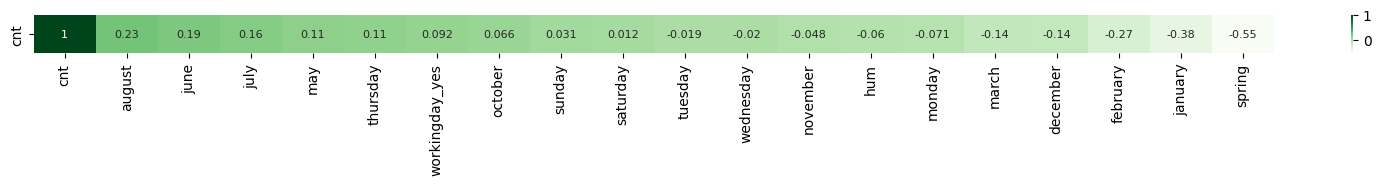

In [136]:
plt.figure(figsize=(20, 0.5))
sns.heatmap(difference_data.corr().loc[["cnt"]].sort_values(by="cnt",axis=1,ascending=False),annot=True,cmap="Greens",annot_kws={"fontsize":8})
plt.show()

#### Adding : We will go with August first as it has 0.23 +correlation with cnt

In [137]:
model_23["august"] = X_train["august"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [138]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.26e-187
Time:                        04:49:43   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1312      0.017      7.871      

In [139]:
get_vif(model_23_lm)

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,2019,2.00
4,summer,1.81
9,august,1.58
5,winter,1.49
8,misty,1.48
6,september,1.31
7,light snow,1.08
1,holiday_yes,1.04


#### Conclusion : As we can see adding `August` to model_23 increases VIF value for `temp`, so we are removing it again.

In [140]:
model_23.drop(["august"],inplace=True,axis=1)

#### Adding : We will go with June first as it has 0.19 +correlation with cnt

In [141]:
model_23["june"] = X_train["june"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [142]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.99e-185
Time:                        04:49:43   Log-Likelihood:                 491.78
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     499   BIC:                            -915.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1256      0.017      7.458      

#### Conclusion :  As we can see adding `June` to model_23 increases P-Value for `June`, so we are removing it again.

In [143]:
model_23.drop(["june"],inplace=True,axis=1)

#### Adding : We will go with July first as it has 0.16 +correlation with cnt

In [144]:
model_23["july"] = X_train["july"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [145]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.09e-186
Time:                        04:49:43   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1224      0.017      7.283      

In [146]:
get_vif(model_23_lm)

,Features,VIF
2,temp,5.06
3,windspeed,3.09
0,2019,2.01
4,summer,1.75
9,july,1.52
8,misty,1.49
5,winter,1.46
6,september,1.29
7,light snow,1.08
1,holiday_yes,1.04


#### Conclusion : As we can see adding `July` to model_23 increases VIF value for `temp` also decreases the Adjusted R-Squared value too, so we are removing it again.

In [147]:
model_23.drop(["july"],inplace=True,axis=1)

#### Adding : We will go with Spring first as it has 0.55 -correlation with cnt

In [148]:
model_23["spring"] = X_train["spring"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [149]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.36e-187
Time:                        04:49:43   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1910      0.030      6.456      

In [150]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,2019,2.07
9,spring,1.99
4,summer,1.89
5,winter,1.63
8,misty,1.54
6,september,1.23
7,light snow,1.08
1,holiday_yes,1.04


#### Conclusion : As we can adding `Spring` increases the VIF for `windspeed` but still it is under the VIF < 5 threshold,also it increases the `Adjusted R-Squared` value by `0.2%` to the model_23, so we are keeping `Spring` as a feature.

#### Adding : We will go with March as it has 0.14 -correlation with cnt

In [151]:
model_23["march"] = X_train["march"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [152]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.31e-186
Time:                        04:49:44   Log-Likelihood:                 497.43
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1941      0.030      6.576      

In [153]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
9,spring,2.18
0,2019,2.07
4,summer,1.95
5,winter,1.63
8,misty,1.54
10,march,1.29
6,september,1.23
7,light snow,1.08


#### Conclusion : As we can see adding `March` in dataset keeps VIF under 5 threshold,also it increases the `Adjusted R-Squared` value by `0.3%` to the model_23, so we are keeping `March` as a feature.

#### Adding : We will go with January as it has 0.38 -correlation with cnt

In [154]:
model_23["january"] = X_train["january"] 
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [155]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.66e-186
Time:                        04:49:44   Log-Likelihood:                 498.74
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -916.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2063      0.030      6.779      

#### Conclusion : As we can see adding `January` in dataset increases the P-value for `March` so we are removing it

In [156]:
model_23.drop(["january"],inplace=True,axis=1)

#### Adding : We will go with February as it has 0.27 -correlation with cnt

In [157]:
model_23["february"] = X_train["february"]
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [158]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.37e-185
Time:                        04:49:44   Log-Likelihood:                 497.83
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     497   BIC:                            -914.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1944      0.030      6.583      

#### Conclusion : As we can see adding `February` in dataset increases the P-value so we are removing it

In [159]:
model_23.drop(["february"],inplace=True,axis=1)

#### Adding : We will go with November as it has 0.048 -correlation with cnt

In [160]:
model_23["november"] = X_train["november"]
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [161]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.68e-186
Time:                        04:49:44   Log-Likelihood:                 498.19
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     497   BIC:                            -915.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.687      

#### Conclusion :  As we can see adding `November` in dataset increases the P-value so we are removing it

In [162]:
model_23.drop(["november"],inplace=True,axis=1)

In [163]:
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [164]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.31e-186
Time:                        04:49:44   Log-Likelihood:                 497.43
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1941      0.030      6.576      

In [165]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
9,spring,2.18
0,2019,2.07
4,summer,1.95
5,winter,1.63
8,misty,1.54
10,march,1.29
6,september,1.23
7,light snow,1.08


### Adding : Now we will add `extra feature` name `Registered` to `model_23` to check the R-Squared value

In [166]:
model_23['very high'] = registered_bin_dummies['very high']

model_23.head(5)

,const,2019,holiday_yes,temp,windspeed,summer,winter,september,light snow,misty,spring,march,very high
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,0,0,0


In [167]:
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

In [168]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     259.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.89e-205
Time:                        04:49:44   Log-Likelihood:                 544.49
No. Observations:                 510   AIC:                            -1063.
Df Residuals:                     497   BIC:                            -1008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2008      0.027      7.451      

In [169]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.63
2,temp,4.03
0,2019,2.78
9,spring,2.23
11,very high,2.00
4,summer,1.95
5,winter,1.63
8,misty,1.58
10,march,1.29
6,september,1.25


#### Conclusion : As we can see after adding `Very High` bin to our final datamodel we got 0.86 Adjusted R-Squared which means our model covers 86% variance of data.

#### Adding high,medium,low,very low to check impact on R-squared value.

In [170]:
model_23['high'] = registered_bin_dummies['high']

model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

print(lr.summary())

get_vif(model_23_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     290.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.21e-222
Time:                        04:49:44   Log-Likelihood:                 587.37
No. Observations:                 510   AIC:                            -1147.
Df Residuals:                     496   BIC:                            -1087.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1965      0.025      7.920      

,Features,VIF
3,windspeed,4.64
2,temp,4.43
0,2019,3.79
11,very high,2.90
9,spring,2.28
12,high,2.00
4,summer,1.96
5,winter,1.64
8,misty,1.64
10,march,1.29


#### Conclusion : As we can see after adding `High` bin to our final datamodel we got high P-Values, so droping High bin

In [171]:
model_23.drop(["high"],inplace=True,axis=1)

In [172]:
model_23['medium'] = registered_bin_dummies['medium']

model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

print(lr.summary())

get_vif(model_23_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     240.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.48e-204
Time:                        04:49:44   Log-Likelihood:                 545.70
No. Observations:                 510   AIC:                            -1063.
Df Residuals:                     496   BIC:                            -1004.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2020      0.027      7.503      

,Features,VIF
2,temp,4.75
3,windspeed,4.66
0,2019,2.79
9,spring,2.24
11,very high,2.15
4,summer,1.95
5,winter,1.69
8,misty,1.59
12,medium,1.50
10,march,1.30


#### Conclusion : As we can see after adding `Medium` bin to our final datamodel we got high P-Values, so droping High bin

In [173]:
model_23.drop(["medium"],inplace=True,axis=1)

In [174]:
model_23['low'] = registered_bin_dummies['low']

model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

print(lr.summary())

get_vif(model_23_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     242.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.23e-205
Time:                        04:49:44   Log-Likelihood:                 547.27
No. Observations:                 510   AIC:                            -1067.
Df Residuals:                     496   BIC:                            -1007.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2065      0.027      7.664      

,Features,VIF
3,windspeed,4.63
2,temp,4.23
0,2019,2.81
9,spring,2.25
11,very high,2.06
4,summer,1.96
5,winter,1.69
8,misty,1.59
12,low,1.36
10,march,1.29


#### Conclusion : As we can see after adding `Low` bin to our final datamodel we got high P-Values and lowered the R-squared and Adj. R-Squared, so droping High bin

In [175]:
model_23.drop(["low"],inplace=True,axis=1)

## Re-Building Model_23 as `Final Manual Model` and checking R-Squared and Adj.R-Squared

In [176]:
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)
print(lr.summary())
get_vif(model_23_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     259.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.89e-205
Time:                        04:49:44   Log-Likelihood:                 544.49
No. Observations:                 510   AIC:                            -1063.
Df Residuals:                     497   BIC:                            -1008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2008      0.027      7.451      

,Features,VIF
3,windspeed,4.63
2,temp,4.03
0,2019,2.78
9,spring,2.23
11,very high,2.00
4,summer,1.95
5,winter,1.63
8,misty,1.58
10,march,1.29
6,september,1.25


In [177]:
f"Total Features selected : {list(model_23.columns).__len__()}"

'Total Features selected : 13'

### We now have a adjusted R - Squared value of 85.9% which is better compared to our other models. The VIF's of the feature variables are also in check.


##  Feature Selection Using RFE

- Here we will check what best feature is RFE returning

In [178]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [179]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15) # setting the limit of our feature variables to 15
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [180]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('2019', True, 1),
 ('holiday_yes', True, 1),
 ('workingday_yes', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 6),
 ('december', True, 1),
 ('february', False, 2),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 13),
 ('may', False, 5),
 ('november', True, 1),
 ('october', False, 9),
 ('september', True, 1),
 ('monday', False, 4),
 ('saturday', False, 11),
 ('sunday', False, 8),
 ('thursday', False, 10),
 ('tuesday', False, 3),
 ('wednesday', False, 7),
 ('light snow', True, 1),
 ('misty', True, 1)]

In [181]:
# Storing variables with significant weights in a variable

rfe_vars=list(X_train.columns[rfe.support_])

In [182]:
#Creating a train dataset using RFE variables

model_24_rfe=X_train[rfe_vars]
model_24_rfe.head()

,2019,holiday_yes,temp,hum,windspeed,spring,summer,winter,december,january,july,november,september,light snow,misty
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [183]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.34e-189
Time:                        04:49:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3202      0.036      8.886      

In [184]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : december as it has highest P-Value of 0.034.


In [185]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,misty,2.32
0,2019,2.09
11,november,1.83
9,january,1.75


In [186]:
model_24_rfe = model_24_rfe.drop(drop_column,axis=1)

In [187]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.25e-189
Time:                        04:49:45   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3030      0.035      8.597      

In [188]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : november as it has highest P-Value of 0.144.


In [189]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
13,misty,2.29
0,2019,2.09
8,january,1.67
9,july,1.59


In [190]:
model_24_rfe = model_24_rfe.drop(drop_column,axis=1)

In [191]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.45e-190
Time:                        04:49:45   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2957      0.035      8.466      

In [192]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : january as it has highest P-Value of 0.061.


In [193]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
12,misty,2.28
0,2019,2.09
8,january,1.67
9,july,1.59


In [194]:
model_24_rfe = model_24_rfe.drop(drop_column,axis=1)

In [195]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        04:49:45   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2841      0.034      8.242      

In [196]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : spring as it has highest P-Value of 0.007.


In [197]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,misty,2.28
0,2019,2.08
8,july,1.58
9,september,1.38


In [198]:
model_24_rfe = model_24_rfe.drop(drop_column,axis=1)

In [199]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.89e-190
Time:                        04:49:45   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2257      0.027      8.368      

In [200]:
drop_column, drop_column_p_value = find_highest_p_value(lr,significance=0.005)

Remove Column : july as it has highest P-Value of 0.008.


In [201]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,14.55
2,temp,10.20
4,windspeed,3.56
10,misty,2.11
0,2019,2.02
5,summer,1.76
6,winter,1.71
7,july,1.55
8,september,1.29
9,light snow,1.16


In [202]:
model_24_rfe = model_24_rfe.drop(drop_column,axis=1)

In [203]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.80e-190
Time:                        04:49:45   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2256      0.027      8.314      

In [204]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,hum,14.27
2,temp,8.00
4,windspeed,3.55
9,misty,2.11
0,2019,2.01
6,winter,1.66
5,summer,1.58
7,september,1.21
8,light snow,1.16
1,holiday_yes,1.04


In [205]:
model_24_rfe = model_24_rfe.drop("hum",axis=1)

In [206]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.37e-186
Time:                        04:49:45   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1264      0.017      7.541      

In [207]:
get_vif(model_24_rfe_lr)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,2019,2.00
4,summer,1.56
8,misty,1.48
5,winter,1.38
6,september,1.20
7,light snow,1.08
1,holiday_yes,1.03


In [208]:
model_24_rfe["spring"] = X_train["spring"]

In [209]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.36e-187
Time:                        04:49:45   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1910      0.030      6.456      

In [210]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,2019,2.07
9,spring,1.99
4,summer,1.89
5,winter,1.63
8,misty,1.54
6,september,1.23
7,light snow,1.08
1,holiday_yes,1.04


In [211]:
model_24_rfe["december"] = X_train["december"]
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.22e-186
Time:                        04:49:45   Log-Likelihood:                 496.01
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     498   BIC:                            -917.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1984      0.030      6.587      

In [212]:
model_24_rfe = model_24_rfe.drop("december",axis=1)

In [213]:
model_24_rfe["january"] = X_train["january"]
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.01e-186
Time:                        04:49:45   Log-Likelihood:                 497.69
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     498   BIC:                            -920.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2080      0.030      6.834      

In [214]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,windspeed,4.61
2,temp,3.85
9,spring,2.63
0,2019,2.07
4,summer,1.90
5,winter,1.64
10,january,1.60
8,misty,1.55
6,september,1.23
7,light snow,1.08


In [215]:
model_24_rfe["july"] = X_train["july"]
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.97e-187
Time:                        04:49:45   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2155      0.030      7.096      

In [216]:
get_vif(model_24_rfe_lr)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,spring,2.75
4,summer,2.22
0,2019,2.07
5,winter,1.79
10,january,1.61
11,july,1.59
8,misty,1.56
6,september,1.34


In [217]:
model_24_rfe = model_24_rfe.drop("july",axis=1)

In [218]:
model_24_rfe["november"] = X_train["november"]
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.03e-186
Time:                        04:49:46   Log-Likelihood:                 498.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     497   BIC:                            -916.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2138      0.031      6.951      

In [219]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,windspeed,4.66
2,temp,3.87
9,spring,2.64
5,winter,2.13
0,2019,2.07
4,summer,1.90
10,january,1.60
11,november,1.59
8,misty,1.55
6,september,1.24


In [220]:
model_24_rfe = model_24_rfe.drop("november",axis=1)

In [221]:
model_24_rfe.head()

,2019,holiday_yes,temp,windspeed,summer,winter,september,light snow,misty,spring,january
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0,0


In [222]:
model_24_rfe["very high"] = registered_bin_dummies["very high"]

In [223]:
model_24_rfe_lr,lr = construct_ols(x_train=model_24_rfe,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.31e-205
Time:                        04:49:46   Log-Likelihood:                 545.30
No. Observations:                 510   AIC:                            -1065.
Df Residuals:                     497   BIC:                            -1010.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2148      0.028      7.737      

In [224]:
get_vif(model_24_rfe_lr)

,Features,VIF
3,windspeed,4.63
2,temp,4.05
0,2019,2.79
9,spring,2.67
11,very high,1.99
4,summer,1.90
5,winter,1.64
10,january,1.60
8,misty,1.59
6,september,1.25


### Here we can see apart from `January` we have covered all the features in `Manual Feature Selection`, we will again take look on `January` on model_23

In [225]:
model_24_rfe.columns.difference(model_23.columns)

Index(['january'], dtype='object')

In [226]:
model_23["january"] = X_train["january"]
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.34e-205
Time:                        04:49:46   Log-Likelihood:                 546.17
No. Observations:                 510   AIC:                            -1064.
Df Residuals:                     496   BIC:                            -1005.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2133      0.028      7.684      

In [227]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.64
2,temp,4.05
9,spring,3.25
0,2019,2.79
11,very high,2.00
4,summer,1.97
12,january,1.82
5,winter,1.64
8,misty,1.59
10,march,1.46


In [228]:
model_23 = model_23.drop("march",axis=1)

In [229]:
model_23_lm,lr = construct_ols(x_train=model_23,y_train=y_train)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.31e-205
Time:                        04:49:46   Log-Likelihood:                 545.30
No. Observations:                 510   AIC:                            -1065.
Df Residuals:                     497   BIC:                            -1010.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2148      0.028      7.737      

In [230]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.63
2,temp,4.05
0,2019,2.79
9,spring,2.67
10,very high,1.99
4,summer,1.90
5,winter,1.64
11,january,1.60
8,misty,1.59
6,september,1.25


### As we can see by adding January and removing March we have received 86% of Adjusted R-Squared which is better than 85.9%

### Step 6:  Residual Analysis

In [231]:
model_23_lm

,const,2019,holiday_yes,temp,windspeed,summer,winter,september,light snow,misty,spring,very high,january
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0,1,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,1,0,0,0,1,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,1,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1,0,0,0


In [232]:
y_train_pred = lr.predict(model_23_lm)

Text(0.5, 0, 'Errors')

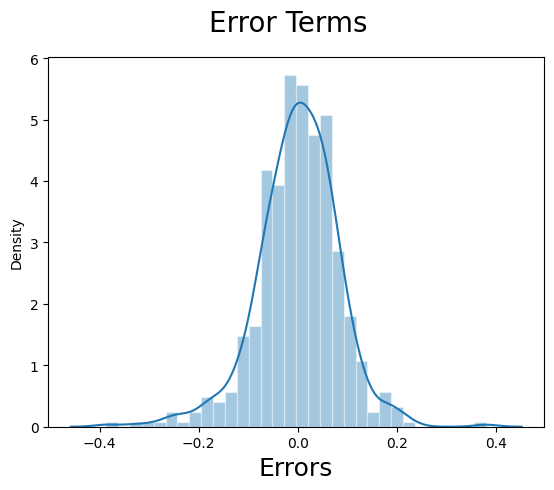

In [233]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot(
    (y_train - y_train_pred),
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)  

### Conclusion : From above graph we can say that Errors are nosrmally distributed

In [234]:
model_23 = model_23.drop(["const"],axis=1)

Text(0, 0.5, 'Residuals')

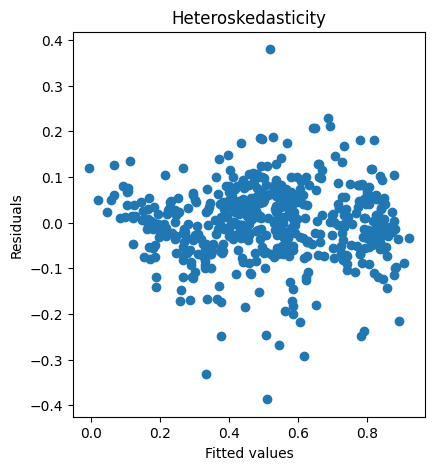

In [235]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

### Conclusion : From the scatter plot, we do not see a any pattern and most of the points are centered around zero. So we do not have any heteroskedasticity.


### No Multicollinearity

#### We have VIFs of all feature variables below 5, so there is no multicollinearity.

In [236]:
get_vif(model_23_lm)

,Features,VIF
3,windspeed,4.63
2,temp,4.05
0,2019,2.79
9,spring,2.67
10,very high,1.99
4,summer,1.90
5,winter,1.64
11,january,1.60
8,misty,1.59
6,september,1.25


### Step 7: Making Predictions

In [237]:
#Applying scaling on test data
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [238]:
df_test.describe()

,2019,holiday_yes,workingday_yes,temp,hum,windspeed,cnt,spring,summer,winter,...,sunday,thursday,tuesday,wednesday,light snow,misty,low,medium,high,very high
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.200913,0.205479,0.228311,0.182648
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.401601,0.404977,0.420705,0.387263
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [239]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

In [240]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[model_23.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [241]:
# Making predictions

y_pred = lr.predict(X_test_new)

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

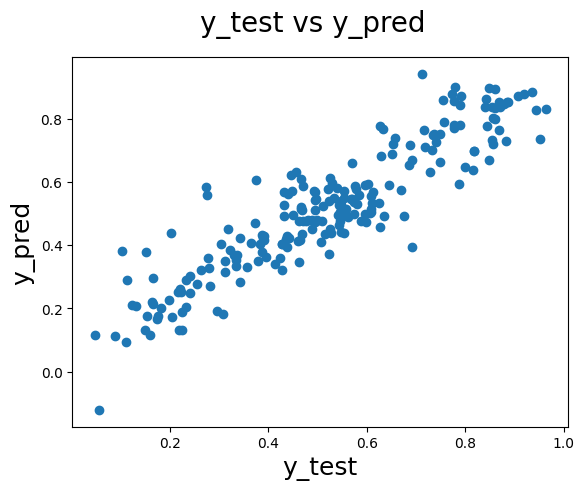

In [242]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

In [243]:
from sklearn.metrics import r2_score

### Mean Squared Error:

In [244]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.006899463521368841
0.008267355072380411


### Conclusion : We have a Mean Squared Error close to 0 on the training/test dataset, meaning our model is able to correctly predict all variances in the data.


### R-Squared Score:

In [245]:
print("R-Suared of train data : "+str(round(r2_score(y_true=y_train, y_pred=y_train_pred)*100,2))+"%")
print("R-Suared of test data : "+str(round(r2_score(y_true=y_test, y_pred=y_pred)*100,2))+"%")

R-Suared of train data : 86.3%
R-Suared of test data : 82.59%


### Steps We Followed : 

1. We had a dataset with 510 records of data with the target and feature variables.
2. Performed EDA on the dataset to check for significant inferences and identify variables for data preparation. Used scatter plots for numerical and boxplots for categorical variables.
3. Prepared the data by converting categorical variables into dummy variables.
    - season
    - weathersit
    - month
    - weekday
    - registered
    - yr
    - workingday_yes
    - weekdays
4. Dropped irrelevant and categorical variables from the data.
    - season
    - weathersit
    - month
    - weekday
    - instant
    - dteday
    - atemp
    - registered
    - casual
5. Split the data into test and train datasets in a 70:30 ratio.
6. Rescaled numerical variables using MinMax method.
7. Plotted a heatmap to check linearity among all the variables and identified temp to be the most significant feature.
8. Built a model using only `temp` feature with `41%` adjusted R-Square.
9. Manually identified other feature variables and built `23 other models` to fine tune the adjusted `R-square to 83.5%`.
11. Added a binned feature variable - `high registered counts to increase the accuracy to 86.3%`.
12. Performed residual analysis to confirm assumption of residuals hold true.
13. Made predictions on the train data.
14. Evaluated the model on test data with `82.59 %` accuracy.